<span style="color: #60B5FC; font-weight: bold; font-size: 24px;">01 Exploring data</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data preparation and data clearning
EDA, feature importance analysis
Model selection process and parameter tuning

In [2]:
df = pd.read_csv('/Users/anagilabert/repos/students_exam_scores/data/Expanded_data_with_more_features.csv', index_col=0)
df = df.drop(['ReadingScore', 'WritingScore'], axis=1)


In [3]:

df.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
dtype: int64

In [4]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76


In [5]:
df.shape

(30641, 12)

In [6]:
df.dtypes

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
dtype: object

In [7]:
df.describe(include='all')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore
count,30641,28801,28796,30641,28811,29451,30010,29737,29069.000000,27507,29686,30641.000000
unique,2,5,6,2,2,4,3,2,NaN,2,3,NaN
top,female,group C,some college,standard,none,married,sometimes,yes,NaN,school_bus,5 - 10,NaN
freq,15424,9212,6633,19905,18856,16844,15213,19082,NaN,16145,16246,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.145894,NaN,NaN,66.558402
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.458242,NaN,NaN,15.361616
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,56.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,67.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,78.000000


#### Format review

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
# df['nrsiblings'] = df['nrsiblings'].astype(int)

#### Get the unique values in each column


In [10]:
print('Unique values in the column:')
for column in df.columns:
    unique_values = df[column].value_counts().index.tolist()
    print(f"'{column}': {unique_values}")

Unique values in the column:
'gender': ['female', 'male']
'ethnicgroup': ['group C', 'group D', 'group B', 'group E', 'group A']
'parenteduc': ['some college', 'high school', "associate's degree", 'some high school', "bachelor's degree", "master's degree"]
'lunchtype': ['standard', 'free/reduced']
'testprep': ['none', 'completed']
'parentmaritalstatus': ['married', 'single', 'divorced', 'widowed']
'practicesport': ['sometimes', 'regularly', 'never']
'isfirstchild': ['yes', 'no']
'nrsiblings': [1.0, 2.0, 3.0, 0.0, 4.0, 5.0, 6.0, 7.0]
'transportmeans': ['school_bus', 'private']
'wklystudyhours': ['5 - 10', '< 5', '> 10']
'mathscore': [64, 67, 71, 70, 63, 62, 65, 66, 72, 69, 75, 73, 60, 61, 74, 76, 58, 59, 57, 77, 78, 56, 79, 80, 68, 53, 55, 54, 82, 81, 83, 51, 52, 84, 50, 85, 49, 86, 48, 47, 45, 88, 46, 87, 89, 44, 100, 90, 91, 43, 42, 93, 92, 41, 94, 95, 39, 40, 97, 96, 38, 36, 37, 99, 35, 98, 32, 33, 31, 34, 29, 30, 28, 26, 27, 25, 24, 23, 22, 21, 19, 18, 10, 16, 13, 17, 20, 9, 11, 14,

<p style="color: red;">¿Cómo hago para no tener en cuenta aquellos resultados que eran nan y he sustituido por ceros?</p>

#### Separate df in numeric and categorical columns

In [11]:
numeric_columns = df.select_dtypes(include=['int', 'float'])
print("Numeric columns:")
print(numeric_columns)

Numeric columns:
     nrsiblings  mathscore
0           3.0         71
1           0.0         69
2           4.0         87
3           1.0         45
4           0.0         76
..          ...        ...
816         2.0         59
890         1.0         58
911         1.0         61
934         3.0         82
960         1.0         64

[30641 rows x 2 columns]


In [12]:
categorical_columns = df.select_dtypes(include=['object'])
print("Categorical columns:")
print(categorical_columns)

Categorical columns:
     gender ethnicgroup          parenteduc     lunchtype   testprep  \
0    female         NaN   bachelor's degree      standard       none   
1    female     group C        some college      standard        NaN   
2    female     group B     master's degree      standard       none   
3      male     group A  associate's degree  free/reduced       none   
4      male     group C        some college      standard       none   
..      ...         ...                 ...           ...        ...   
816  female     group D         high school      standard       none   
890    male     group E         high school      standard       none   
911  female         NaN         high school  free/reduced  completed   
934  female     group D  associate's degree      standard  completed   
960    male     group B        some college      standard       none   

    parentmaritalstatus practicesport isfirstchild transportmeans  \
0               married     regularly        

In [13]:
for column in categorical_columns:
    percentage_values = df[column].value_counts(normalize=True) * 100
    print(f'Percentage of unique values in {column}:\n{percentage_values}\n')

Percentage of unique values in gender:
gender
female    50.337783
male      49.662217
Name: proportion, dtype: float64

Percentage of unique values in ethnicgroup:
ethnicgroup
group C    31.985001
group D    26.051179
group B    20.228464
group E    14.030763
group A     7.704594
Name: proportion, dtype: float64

Percentage of unique values in parenteduc:
parenteduc
some college          23.034449
high school           19.749271
associate's degree    19.273510
some high school      19.158911
bachelor's degree     11.758578
master's degree        7.025281
Name: proportion, dtype: float64

Percentage of unique values in lunchtype:
lunchtype
standard        64.961979
free/reduced    35.038021
Name: proportion, dtype: float64

Percentage of unique values in testprep:
testprep
none         65.447225
completed    34.552775
Name: proportion, dtype: float64

Percentage of unique values in parentmaritalstatus:
parentmaritalstatus
married     57.193304
single      24.097654
divorced    16.702319

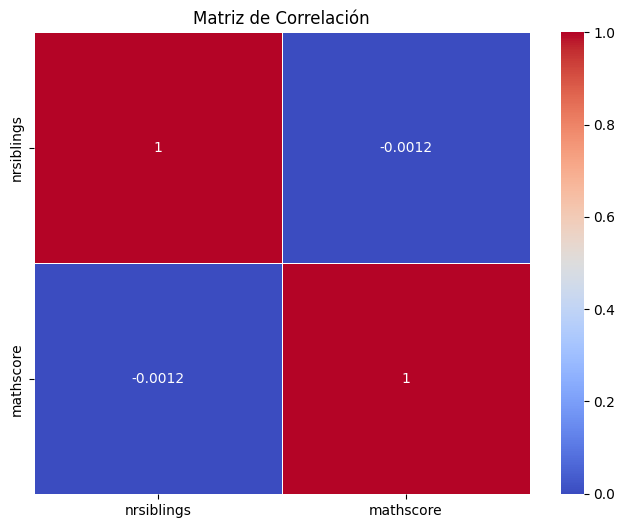

In [14]:
numeric_corr_matrix = numeric_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [15]:
# report = sv.analyze(df, target_feat='mathscore')
# report.show_html('sweetviz_report.html')

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

target_column = 'mathscore'

education_levels = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5,
}

# Define a dictionary with the transformations you want to apply to specific columns in your dataset
transformations = {
    'parenteduc': education_levels,
    'practicesport': {'never': 0, 'sometimes': 1, 'regularly': 2},
    'wklystudyhours': {'<5h': 0, '5-10h': 1, '>10h': 2},
    'testprep': {'none': 0, 'completed': 1},
    'isfirstchild': {'yes': 1, 'no': 0}
}

# Automatically identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns.remove(target_column)

# Create transformers for specific categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define a custom transformer to apply the transformations to specific columns
class CustomTransformer:
    def __init__(self, transformations):
        self.transformations = transformations

    def transform(self, X):
        X_copy = X.copy()
        for column, mapping in self.transformations.items():
            X_copy[column] = X_copy[column].map(mapping)
        return X_copy

    def fit(self, X, y=None):
        return self

# Wrap the custom transformer using FunctionTransformer
custom_transformer = FunctionTransformer(CustomTransformer(transformations).transform)

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_columns),
        ('numerical', numerical_transformer, numerical_columns),
        ('custom', custom_transformer, list(transformations.keys()))
    ],
    remainder='passthrough'
)

# Step 3: Machine Learning Model
classifier = RandomForestClassifier()

# Create the pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', classifier)
])

def split_train_test(X, y):
    # Split the data into a training set (60%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

    # Split the remaining data into a validation set (20%) and a test set (20%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    df_train = pd.concat([X_train, y_train], axis=1)
    df_val = pd.concat([X_val, y_val], axis=1)
    df_test = pd.concat([X_test, y_test], axis=1)

    return X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val = split_train_test(X, y)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)


/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict using the pipeline
y_test_pred = pipeline.predict(X_test)
y_val_pred = pipeline.predict(X_val)

# Calculate MAE for the test and validation datasets
test_mae = mean_absolute_error(y_test, y_test_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

# Calculate MSE for the test and validation datasets
test_mse = mean_squared_error(y_test, y_test_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

# Calculate RMSE for the test and validation datasets
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

# Calculate R-squared (R^2) for the test and validation datasets
test_r2 = r2_score(y_test, y_test_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print the regression metrics
print("Test MAE:", test_mae)
print("Validation MAE:", val_mae)
print("\nTest MSE:", test_mse)
print("Validation MSE:", val_mse)
print("\nTest RMSE:", test_rmse)
print("Validation RMSE:", val_rmse)
print("\nTest R-squared:", test_r2)
print("Validation R-squared:", val_r2)


/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Test MAE: 14.68575624082232
Validation MAE: 14.546997389033942

Test MSE: 333.8060042421276
Validation MSE: 327.5972584856397

Test RMSE: 18.270358623796294
Validation RMSE: 18.09964802104283

Test R-squared: -0.4083134824758805
Validation R-squared: -0.39543429463034374


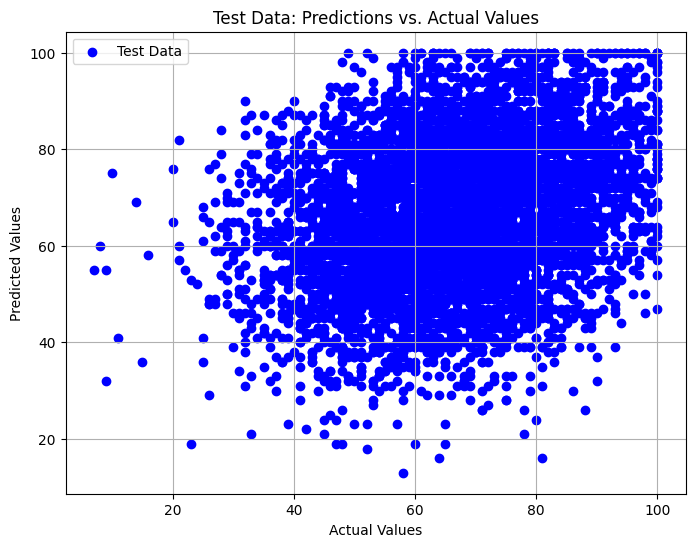

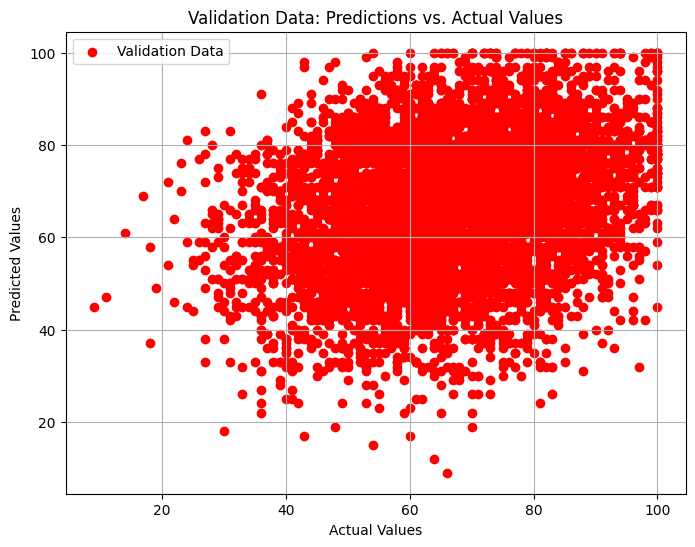

In [18]:
import matplotlib.pyplot as plt

# Create a scatter plot for the test dataset
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: Predictions vs. Actual Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Create a scatter plot for the validation dataset
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, color='red', label='Validation Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Data: Predictions vs. Actual Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()


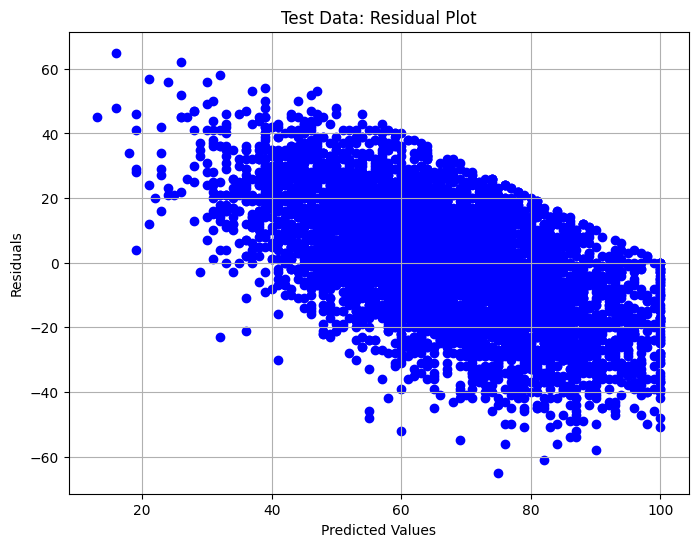

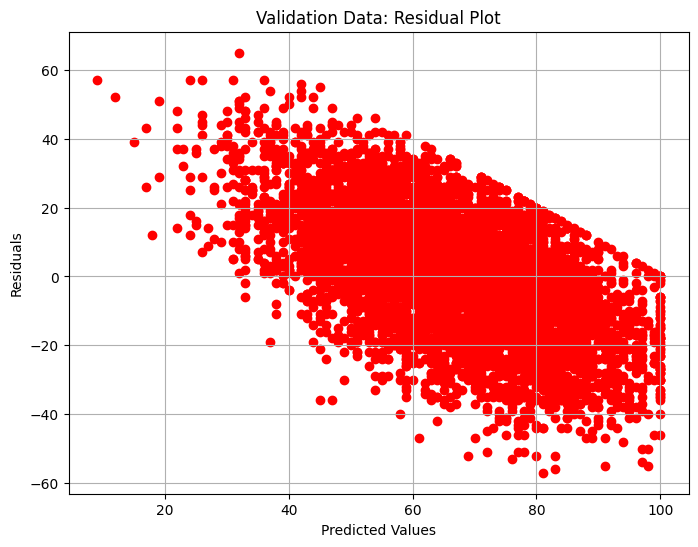

In [20]:
# Create a residual plot for the test dataset
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, y_test - y_test_pred, color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test Data: Residual Plot')
plt.grid(True)
plt.show()


# Create a residual plot for the validation dataset
plt.figure(figsize=(8, 6))
plt.scatter(y_val_pred, y_val - y_val_pred, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Validation Data: Residual Plot')
plt.grid(True)
plt.show()


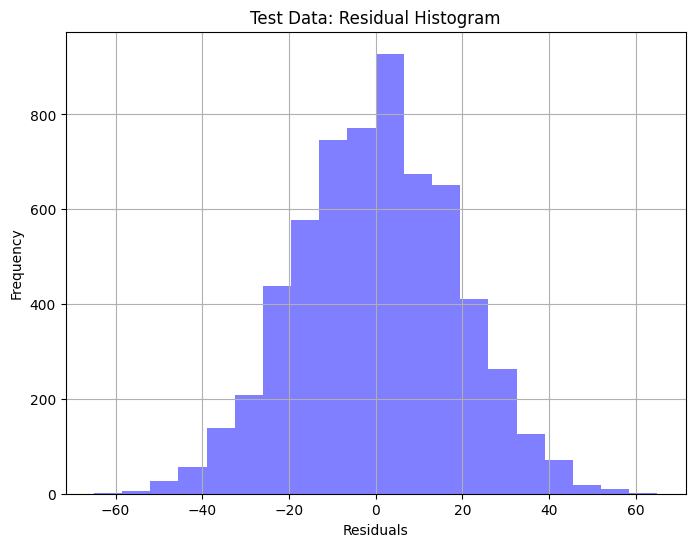

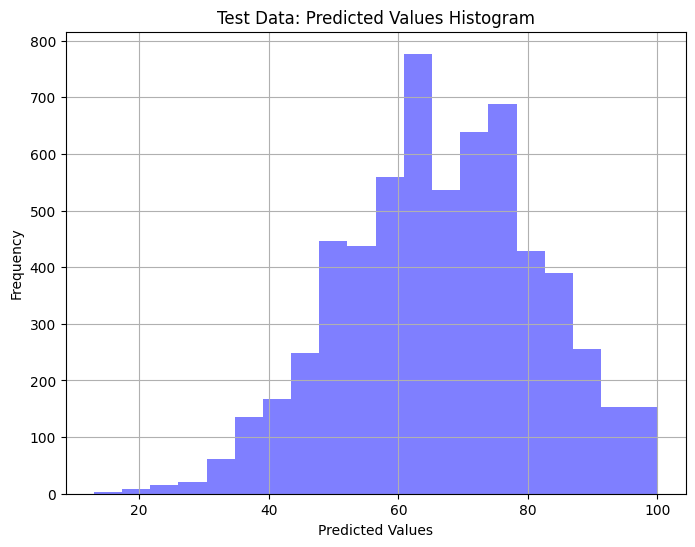

In [21]:
# Create a histogram of residuals for test data
plt.figure(figsize=(8, 6))
plt.hist(y_test - y_test_pred, bins=20, color='blue', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Test Data: Residual Histogram')
plt.grid(True)
plt.show()


# Create a histogram of predicted values for test data
plt.figure(figsize=(8, 6))
plt.hist(y_test_pred, bins=20, color='blue', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Test Data: Predicted Values Histogram')
plt.grid(True)
plt.show()


In [27]:
from sklearn.linear_model import LogisticRegression  # Importa Regresión Logística

target_column = 'mathscore'

education_levels = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5,
}

# Define a dictionary with the transformations you want to apply to specific columns in your dataset
transformations = {
    'parenteduc': education_levels,
    'practicesport': {'never': 0, 'sometimes': 1, 'regularly': 2},
    'wklystudyhours': {'<5h': 0, '5-10h': 1, '>10h': 2},
    'testprep': {'none': 0, 'completed': 1},
    'isfirstchild': {'yes': 1, 'no': 0}
}

# Automatically identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns.remove(target_column)

# Create transformers for specific categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define a custom transformer to apply the transformations to specific columns
class CustomTransformer:
    def __init__(self, transformations):
        self.transformations = transformations

    def transform(self, X):
        X_copy = X.copy()
        for column, mapping in self.transformations.items():
            X_copy[column] = X_copy[column].map(mapping)
        return X_copy

    def fit(self, X, y=None):
        return self

# Wrap the custom transformer using FunctionTransformer
custom_transformer = FunctionTransformer(CustomTransformer(transformations).transform)

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_columns),
        ('numerical', numerical_transformer, numerical_columns),
        ('custom', custom_transformer, list(transformations.keys()))
    ],
    remainder='passthrough'
)

# Step 3: Machine Learning Model
classifier = LinearRegression()

# Create the pipeline with imputer to handle missing values
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('imputer', SimpleImputer(strategy='median')),  # Add an imputer to handle missing values
    ('classifier', classifier)
])

def split_train_test(X, y):
    # Split the data into a training set (60%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

    # Split the remaining data into a validation set (20%) and a test set (20%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    df_train = pd.concat([X_train, y_train], axis=1)
    df_val = pd.concat([X_val, y_val], axis=1)
    df_test = pd.concat([X_test, y_test], axis=1)

    return X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val = split_train_test(X, y)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)


/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  )
/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  )


In [29]:


# Predict using the pipeline
y_test_pred = pipeline.predict(X_test)
y_val_pred = pipeline.predict(X_val)

# Calculate MAE for the test and validation datasets
test_mae = mean_absolute_error(y_test, y_test_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

# Calculate MSE for the test and validation datasets
test_mse = mean_squared_error(y_test, y_test_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

# Calculate RMSE for the test and validation datasets
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

# Calculate R-squared (R^2) for the test and validation datasets
test_r2 = r2_score(y_test, y_test_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print the regression metrics
print("Test MAE:", test_mae)
print("Validation MAE:", val_mae)
print("\nTest MSE:", test_mse)
print("Validation MSE:", val_mse)
print("\nTest RMSE:", test_rmse)
print("Validation RMSE:", val_rmse)
print("\nTest R-squared:", test_r2)
print("Validation R-squared:", val_r2)


Test MAE: 10.598898423478545
Validation MAE: 10.423495379813968

Test MSE: 170.1985860617014
Validation MSE: 165.6640295621309

Test RMSE: 13.046018015536442
Validation RMSE: 12.87105394138844

Test R-squared: 0.28193932882296735
Validation R-squared: 0.29433698771998085


/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  )
/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  )


In [32]:
from xgboost import XGBRegressor  # Importa XGBoost para regresión

target_column = 'mathscore'

education_levels = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5,
}

# Define a dictionary with the transformations you want to apply to specific columns in your dataset
transformations = {
    'parenteduc': education_levels,
    'practicesport': {'never': 0, 'sometimes': 1, 'regularly': 2},
    'wklystudyhours': {'<5h': 0, '5-10h': 1, '>10h': 2},
    'testprep': {'none': 0, 'completed': 1},
    'isfirstchild': {'yes': 1, 'no': 0}
}

# Automatically identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns.remove(target_column)

# Create transformers for specific categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define a custom transformer to apply the transformations to specific columns
class CustomTransformer:
    def __init__(self, transformations):
        self.transformations = transformations

    def transform(self, X):
        X_copy = X.copy()
        for column, mapping in self.transformations.items():
            X_copy[column] = X_copy[column].map(mapping)
        return X_copy

    def fit(self, X, y=None):
        return self

# Wrap the custom transformer using FunctionTransformer
custom_transformer = FunctionTransformer(CustomTransformer(transformations).transform)

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_columns),
        ('numerical', numerical_transformer, numerical_columns),
        ('custom', custom_transformer, list(transformations.keys()))
    ],
    remainder='passthrough'
)

# Step 3: Machine Learning Model
regressor = XGBRegressor()

# Create the pipeline with imputer to handle missing values
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('imputer', SimpleImputer(strategy='median')),  # Add an imputer to handle missing values
    ('regressor', regressor)
])

def split_train_test(X, y):
    # Split the data into a training set (60%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

    # Split the remaining data into a validation set (20%) and a test set (20%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    df_train = pd.concat([X_train, y_train], axis=1)
    df_val = pd.concat([X_val, y_val], axis=1)
    df_test = pd.concat([X_test, y_test], axis=1)

    return X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val = split_train_test(X, y)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)


/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  )
/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  )


In [33]:
# Predict using the pipeline
y_test_pred = pipeline.predict(X_test)
y_val_pred = pipeline.predict(X_val)

# Calculate MAE for the test and validation datasets
test_mae = mean_absolute_error(y_test, y_test_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

# Calculate MSE for the test and validation datasets
test_mse = mean_squared_error(y_test, y_test_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

# Calculate RMSE for the test and validation datasets
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

# Calculate R-squared (R^2) for the test and validation datasets
test_r2 = r2_score(y_test, y_test_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print the regression metrics
print("Test MAE:", test_mae)
print("Validation MAE:", val_mae)
print("\nTest MSE:", test_mse)
print("Validation MSE:", val_mse)
print("\nTest RMSE:", test_rmse)
print("Validation RMSE:", val_rmse)
print("\nTest R-squared:", test_r2)
print("Validation R-squared:", val_r2)


Test MAE: 11.034314291106485
Validation MAE: 10.868053863316229

Test MSE: 185.68479317710052
Validation MSE: 179.81496624202518

Test RMSE: 13.626620754137855
Validation RMSE: 13.409510290910148

Test R-squared: 0.21660367279560921
Validation R-squared: 0.2340596141071839


/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  )
/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  )


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd

target_column = 'mathscore'

education_levels = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5,
}

# Define a dictionary with the transformations you want to apply to specific columns in your dataset
transformations = {
    'parenteduc': education_levels,
    'practicesport': {'never': 0, 'sometimes': 1, 'regularly': 2},
    'wklystudyhours': {'<5h': 0, '5-10h': 1, '>10h': 2},
    'testprep': {'none': 0, 'completed': 1},
    'isfirstchild': {'yes': 1, 'no': 0}
}

# Automatically identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns.remove(target_column)

# Create transformers for specific categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define a custom transformer to apply the transformations to specific columns
class CustomTransformer:
    def __init__(self, transformations):
        self.transformations = transformations

    def transform(self, X):
        X_copy = X.copy()
        for column, mapping in self.transformations.items():
            X_copy[column] = X_copy[column].map(mapping)
        return X_copy

    def fit(self, X, y=None):
        return self

# Wrap the custom transformer using FunctionTransformer
custom_transformer = FunctionTransformer(CustomTransformer(transformations).transform)

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_columns),
        ('numerical', numerical_transformer, numerical_columns),
        ('custom', custom_transformer, list(transformations.keys()))
    ],
    remainder='passthrough'
)

# Step 3: Machine Learning Model
regressor = XGBRegressor()

# Create the pipeline with imputer to handle missing values
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('imputer', SimpleImputer(strategy='median')),
    ('regressor', regressor)
])

def split_train_test(X, y):
    # Split the data into a training set (60%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

    # Split the remaining data into a validation set (20%) and a test set (20%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    df_train = pd.concat([X_train, y_train], axis=1)
    df_val = pd.concat([X_val, y_val], axis=1)
    df_test = pd.concat([X_test, y_test], axis=1)

    return X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val = split_train_test(X, y)

param_dist = {
    'regressor__n_estimators': np.arange(100, 1000, 100),  # Número de árboles en el modelo
    'regressor__learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'regressor__max_depth': np.arange(3, 10, 1),  # Profundidad máxima del árbol
    'regressor__min_child_weight': np.arange(1, 6, 1),  # Peso mínimo de una hoja
    'regressor__gamma': [0, 0.1, 0.2],  # Parámetro gamma
    'regressor__subsample': [0.8, 0.9, 1.0],  # Submuestra de datos para entrenar cada árbol
}

# Crea un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)


# Ajusta el modelo con búsqueda de hiperparámetros aleatoria
random_search.fit(X_train, y_train)

# Encuentra los mejores hiperparámetros
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Utiliza el mejor modelo para hacer predicciones
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  )
/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  )
/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  )
/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for

Mejores hiperparámetros: {'regressor__subsample': 0.9, 'regressor__n_estimators': 300, 'regressor__min_child_weight': 3, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.01, 'regressor__gamma': 0}


/Users/anagilabert/repos/students_exam_scores/.venv/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [34]. At least one non-missing value is needed for imputation with strategy='median'.
  )


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd

target_column = 'mathscore'

education_levels = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5,
}



# Automatically identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns.remove(target_column)

# Create transformers for specific categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


# Wrap the custom transformer using FunctionTransformer

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_columns),
        ('numerical', numerical_transformer, numerical_columns),
    ],
    remainder='passthrough'
)

# Step 3: Machine Learning Model
regressor = XGBRegressor()

# Create the pipeline with imputer to handle missing values
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('imputer', SimpleImputer(strategy='median')),
    ('regressor', regressor)
])

def split_train_test(X, y):
    # Split the data into a training set (60%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

    # Split the remaining data into a validation set (20%) and a test set (20%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    df_train = pd.concat([X_train, y_train], axis=1)
    df_val = pd.concat([X_val, y_val], axis=1)
    df_test = pd.concat([X_test, y_test], axis=1)

    return X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val = split_train_test(X, y)

param_dist = {
    'regressor__n_estimators': np.arange(100, 1000, 100),  # Número de árboles en el modelo
    'regressor__learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'regressor__max_depth': np.arange(3, 10, 1),  # Profundidad máxima del árbol
    'regressor__min_child_weight': np.arange(1, 6, 1),  # Peso mínimo de una hoja
    'regressor__gamma': [0, 0.1, 0.2],  # Parámetro gamma
    'regressor__subsample': [0.8, 0.9, 1.0],  # Submuestra de datos para entrenar cada árbol
}

# Crea un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)


# Ajusta el modelo con búsqueda de hiperparámetros aleatoria
random_search.fit(X_train, y_train)

# Encuentra los mejores hiperparámetros
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Utiliza el mejor modelo para hacer predicciones
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


Mejores hiperparámetros: {'regressor__subsample': 0.9, 'regressor__n_estimators': 300, 'regressor__min_child_weight': 3, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.01, 'regressor__gamma': 0}


In [45]:
# Predict using the pipeline
y_test_pred = best_model.predict(X_test)
y_val_pred = best_model.predict(X_val)

# Calculate MAE for the test and validation datasets
test_mae = mean_absolute_error(y_test, y_test_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

# Calculate MSE for the test and validation datasets
test_mse = mean_squared_error(y_test, y_test_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

# Calculate RMSE for the test and validation datasets
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

# Calculate R-squared (R^2) for the test and validation datasets
test_r2 = r2_score(y_test, y_test_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print the regression metrics
print("Test MAE:", test_mae)
print("Validation MAE:", val_mae)
print("\nTest MSE:", test_mse)
print("Validation MSE:", val_mse)
print("\nTest RMSE:", test_rmse)
print("Validation RMSE:", val_rmse)
print("\nTest R-squared:", test_r2)
print("Validation R-squared:", val_r2)


Test MAE: 10.68221543496148
Validation MAE: 10.509042406829156

Test MSE: 173.04512911288916
Validation MSE: 167.50819380539852

Test RMSE: 13.154661877558432
Validation RMSE: 12.942495655993033

Test R-squared: 0.2699298834969692
Validation R-squared: 0.286481580010275


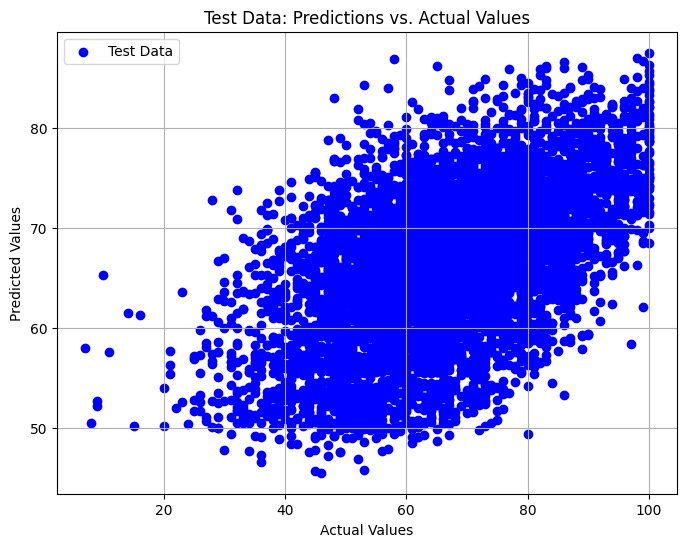

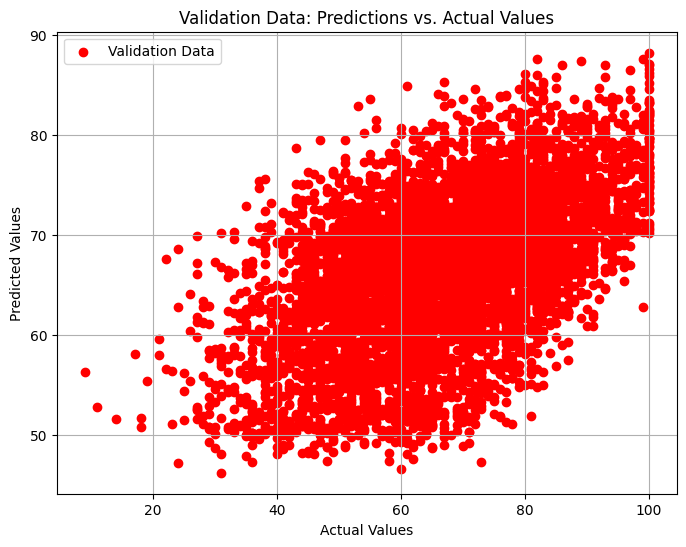

In [40]:
# Create a scatter plot for the test dataset
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: Predictions vs. Actual Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Create a scatter plot for the validation dataset
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, color='red', label='Validation Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Data: Predictions vs. Actual Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()

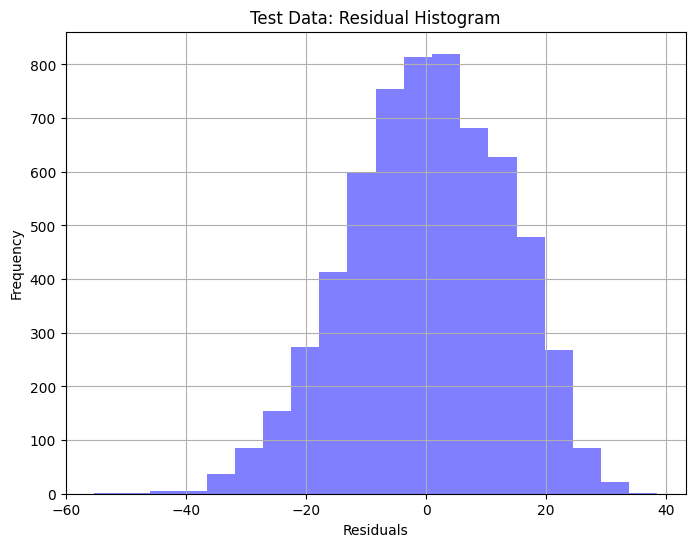

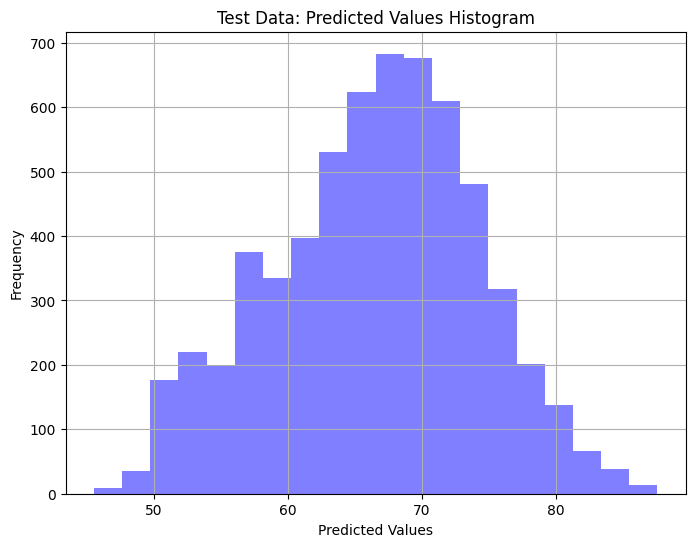

In [41]:
# Create a histogram of residuals for test data
plt.figure(figsize=(8, 6))
plt.hist(y_test - y_test_pred, bins=20, color='blue', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Test Data: Residual Histogram')
plt.grid(True)
plt.show()


# Create a histogram of predicted values for test data
plt.figure(figsize=(8, 6))
plt.hist(y_test_pred, bins=20, color='blue', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Test Data: Predicted Values Histogram')
plt.grid(True)
plt.show()

#### Save model

In [46]:
import joblib

# Guarda el mejor modelo en un archivo
joblib.dump(best_model, 'best_model.pkl',protocol=3)

['best_model.pkl']